<a href="https://colab.research.google.com/github/NATASHASAINI/ML_WEATHER/blob/main/WEATHERB_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weather Forecasting Using Machine Learning


In [338]:
import pandas as pd
import numpy as np
weather = pd.read_csv('/content/nweather.csv',index_col="DATE")
weather

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08
DATE,,,,,,,,,,,,,,,,,,,,
2025-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",16.33,1530.0,0.00,0.0,0.0,48.0,53.0,41,290.0,300.0,33.1,46.1,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",21.47,1451.0,0.00,0.0,0.0,42.0,46.0,35,270.0,250.0,33.1,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",16.11,24.0,0.00,0.0,0.0,37.0,41.0,33,270.0,270.0,28.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",20.80,1538.0,0.00,0.0,0.0,34.0,37.0,30,320.0,300.0,33.1,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.45,58.0,0.00,0.0,0.0,32.0,37.0,29,270.0,270.0,28.0,36.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,0.00,0.0,0.0,NaN,50.0,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,0.00,0.0,0.0,NaN,53.0,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,0.58,0.0,0.0,NaN,57.0,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
weather.loc["1982-01-01":"1982-10-01"]

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08
DATE,,,,,,,,,,,,,,,,,,,,


In [340]:
weather.apply(pd.isnull).sum()/weather.shape[0]

,0
STATION,0.000000
NAME,0.000000
AWND,0.280967
PGTM,0.900302
PRCP,0.000000
SNOW,0.000000
SNWD,0.009063
TAVG,0.277946
TMAX,0.003021
TMIN,0.000000


In [341]:
core_weather = weather[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [342]:
core_weather.columns = ["precip","snow","snow_depth","temp_max","temp_min"]

In [343]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2025-01-01,0.00,0.0,0.0,53.0,41
2025-01-02,0.00,0.0,0.0,46.0,35
2025-01-03,0.00,0.0,0.0,41.0,33
2025-01-04,0.00,0.0,0.0,37.0,30
2025-01-05,0.00,0.0,0.0,37.0,29
...,...,...,...,...,...
2025-11-23,0.00,0.0,0.0,50.0,32
2025-11-24,0.00,0.0,0.0,53.0,41
2025-11-25,0.58,0.0,0.0,57.0,40


In [344]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

,0
precip,0.000000
snow,0.000000
snow_depth,0.009063
temp_max,0.003021
temp_min,0.000000


In [345]:
core_weather["snow"].value_counts()

,count
snow,
0.0,321
0.5,2
0.1,2
1.6,1
0.4,1
0.2,1
3.3,1
1.3,1
1.0,1


In [346]:
core_weather["snow_depth"].value_counts()

,count
snow_depth,
0.0,317
1.2,7
2.0,2
3.1,2


In [347]:
core_weather["precip"].value_counts()

,count
precip,
0.00,212
0.01,16
0.06,8
0.08,7
0.02,7
0.03,6
0.05,5
0.15,4
0.12,4


In [348]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,


In [349]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [350]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2025-08-28,0.08,0.0,0.0,NaN,60


In [351]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,


In [352]:
core_weather = core_weather.fillna(method="ffill")

/tmp/ipython-input-3127936549.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [353]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

,0
precip,0.0
snow,0.0
snow_depth,0.0
temp_max,0.0
temp_min,0.0


In [354]:
core_weather.dtypes

,0
precip,float64
snow,float64
snow_depth,float64
temp_max,float64
temp_min,int64


In [355]:
core_weather.index

Index(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05',
       '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
       ...
       '2025-11-18', '2025-11-19', '2025-11-20', '2025-11-21', '2025-11-22',
       '2025-11-23', '2025-11-24', '2025-11-25', '2025-11-26', '2025-11-27'],
      dtype='object', name='DATE', length=331)

In [356]:
core_weather.index = pd.to_datetime(core_weather.index)

In [357]:
core_weather.index

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-11-18', '2025-11-19', '2025-11-20', '2025-11-21',
               '2025-11-22', '2025-11-23', '2025-11-24', '2025-11-25',
               '2025-11-26', '2025-11-27'],
              dtype='datetime64[ns]', name='DATE', length=331, freq=None)

In [358]:
core_weather.index.year

Index([2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=331)

In [359]:
core_weather.apply(lambda x: (x==9999).sum())

,0
precip,0
snow,0
snow_depth,0
temp_max,0
temp_min,0


<Axes: xlabel='DATE'>

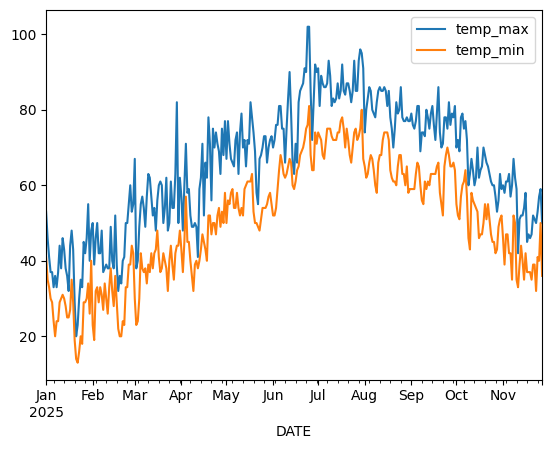

In [360]:
core_weather[["temp_max","temp_min"]].plot()

In [361]:
core_weather.index.year.value_counts().sort_index()

,count
DATE,
2025,331


<Axes: xlabel='DATE'>

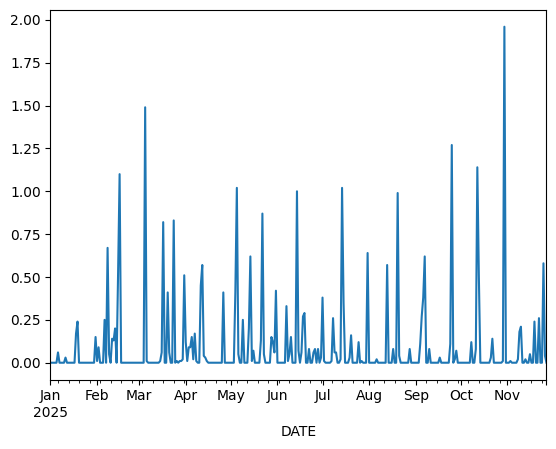

In [362]:
core_weather["precip"].plot()

In [363]:
core_weather.groupby(core_weather.index.year).sum()

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2025,30.7,9.0,18.6,21620.0,16741


In [364]:
core_weather["Target"]= core_weather.shift(-1)["temp_max"]

In [365]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,Target
DATE,,,,,,
2025-01-01,0.00,0.0,0.0,53.0,41,46.0
2025-01-02,0.00,0.0,0.0,46.0,35,41.0
2025-01-03,0.00,0.0,0.0,41.0,33,37.0
2025-01-04,0.00,0.0,0.0,37.0,30,37.0
2025-01-05,0.00,0.0,0.0,37.0,29,33.0
...,...,...,...,...,...,...
2025-11-23,0.00,0.0,0.0,50.0,32,53.0
2025-11-24,0.00,0.0,0.0,53.0,41,57.0
2025-11-25,0.58,0.0,0.0,57.0,40,59.0


In [366]:
core_weather = core_weather.iloc[:-1,:].copy()#lst row with mssing value

In [367]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,Target
DATE,,,,,,
2025-01-01,0.00,0.0,0.0,53.0,41,46.0
2025-01-02,0.00,0.0,0.0,46.0,35,41.0
2025-01-03,0.00,0.0,0.0,41.0,33,37.0
2025-01-04,0.00,0.0,0.0,37.0,30,37.0
2025-01-05,0.00,0.0,0.0,37.0,29,33.0
...,...,...,...,...,...,...
2025-11-22,0.26,0.0,0.0,51.0,39,50.0
2025-11-23,0.00,0.0,0.0,50.0,32,53.0
2025-11-24,0.00,0.0,0.0,53.0,41,57.0


In [368]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [369]:
predictors = ["precip","temp_max","temp_min"]

In [370]:
train = core_weather.loc[:'2025-01-31']
test = core_weather.loc['2025-01-01':]

In [371]:
reg.fit(train[predictors],train["Target"])

Ridge(alpha=0.1)

In [372]:
predictions = reg.predict(test[predictors])

In [373]:
from sklearn.metrics import mean_absolute_error

In [374]:
mean_absolute_error(test["Target"],predictions)

11.536818047771614

In [375]:
combined = pd.concat([test["Target"],pd.Series(predictions,index=test.index)],axis=1)
combined.columns = ["actual","predictions"]

In [376]:
combined

,actual,predictions
DATE,,
2025-01-01,46.0,48.213182
2025-01-02,41.0,43.795635
2025-01-03,37.0,40.879231
2025-01-04,37.0,38.399728
2025-01-05,33.0,38.295172
...,...,...
2025-11-22,50.0,43.992683
2025-11-23,53.0,45.647800
2025-11-24,57.0,48.213182


<Axes: xlabel='DATE'>

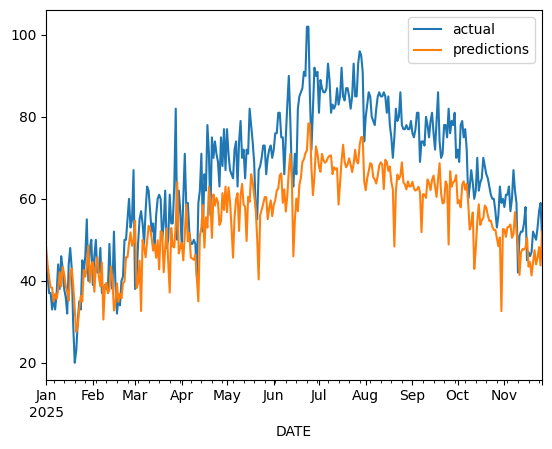

In [377]:
combined.plot()

In [378]:
reg.coef_

array([-11.26334568,   0.54145836,   0.10455636])

In [379]:
def create_predictions(predictors,core_weather,reg):
    train = core_weather.loc[:'2025-01-31']
    test = core_weather.loc['2025-01-01':]
    reg.fit(train[predictors],train["Target"])
    predictions = reg.predict(test[predictors])
    error=mean_absolute_error(test["Target"],predictions)
    combined =combined = pd.concat([test["Target"],pd.Series(predictions,index=test.index)],axis=1)
    combined.columns = ["actual","predictions"]
    return error,combined

In [380]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [381]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,Target,month_max
DATE,,,,,,,
2025-01-01,0.00,0.0,0.0,53.0,41,46.0,NaN
2025-01-02,0.00,0.0,0.0,46.0,35,41.0,NaN
2025-01-03,0.00,0.0,0.0,41.0,33,37.0,NaN
2025-01-04,0.00,0.0,0.0,37.0,30,37.0,NaN
2025-01-05,0.00,0.0,0.0,37.0,29,33.0,NaN
...,...,...,...,...,...,...,...
2025-11-22,0.26,0.0,0.0,51.0,39,50.0,55.800000
2025-11-23,0.00,0.0,0.0,50.0,32,53.0,55.433333
2025-11-24,0.00,0.0,0.0,53.0,41,57.0,55.200000


In [382]:
core_weather["month_day_max"] = core_weather["month_max"]/core_weather["temp_max"]

In [383]:
core_weather["max_min"] = core_weather["temp_max"]/core_weather["temp_min"]

In [384]:
predictors = ["precip","temp_max","temp_min","month_max","month_day_max","max_min"]

In [385]:
core_weather = core_weather.iloc[30:,:].copy()

In [386]:
error,combined = create_predictions(predictors, core_weather, reg)

In [387]:
error

19.756666666666668

<Axes: xlabel='DATE'>

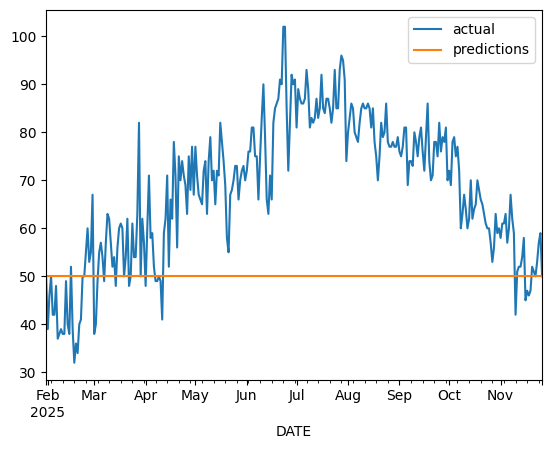

In [388]:
combined.plot()

In [389]:
monthly_avg = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [390]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,Target,month_max,month_day_max,max_min
DATE,,,,,,,,,
2025-01-31,0.15,0.0,0.0,48.0,40,50.0,38.600000,0.804167,1.200000
2025-02-01,0.01,0.0,0.0,50.0,23,39.0,38.733333,0.774667,2.173913
2025-02-02,0.09,0.0,0.0,39.0,19,46.0,38.666667,0.991453,2.052632
2025-02-03,0.00,0.0,0.0,46.0,32,50.0,38.966667,0.847101,1.437500
2025-02-04,0.00,0.0,0.0,50.0,33,42.0,39.400000,0.788000,1.515152
...,...,...,...,...,...,...,...,...,...
2025-11-22,0.26,0.0,0.0,51.0,39,50.0,55.800000,1.094118,1.307692
2025-11-23,0.00,0.0,0.0,50.0,32,53.0,55.433333,1.108667,1.562500
2025-11-24,0.00,0.0,0.0,53.0,41,57.0,55.200000,1.041509,1.292683


In [391]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x:x.expanding(1))

In [392]:
core_weather = core_weather.fillna(method="ffill")

/tmp/ipython-input-3127936549.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")
/tmp/ipython-input-3127936549.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  core_weather = core_weather.fillna(method="ffill")


In [393]:
core_weather["day_of_year_avg"]

,day_of_year_avg
DATE,
2025-01-31,NaN
2025-02-01,NaN
2025-02-02,NaN
2025-02-03,NaN
2025-02-04,NaN
...,...
2025-11-22,NaN
2025-11-23,NaN
2025-11-24,NaN


In [394]:
core_weather["day_of_year_avg"] = core_weather["day_of_year_avg"].fillna(0)

In [395]:
core_weather["day_of_year_avg"]

,day_of_year_avg
DATE,
2025-01-31,0.0
2025-02-01,0.0
2025-02-02,0.0
2025-02-03,0.0
2025-02-04,0.0
...,...
2025-11-22,0.0
2025-11-23,0.0
2025-11-24,0.0


In [396]:
predictors = ["precip","temp_max","temp_min","month_max","month_day_max","max_min","day_of_year_avg"]

In [397]:
error,combined = create_predictions(predictors, core_weather, reg)

In [398]:
error

19.756666666666668

In [399]:
reg.coef_

array([0., 0., 0., 0., 0., 0., 0.])

In [400]:
core_weather.corr()["Target"]

,Target
precip,-0.089917
snow,-0.184375
snow_depth,-0.215421
temp_max,0.886538
temp_min,0.893453
Target,1.000000
month_max,0.846719
month_day_max,-0.128924
max_min,-0.472651
day_of_year_avg,NaN


In [401]:
combined["diff"] = combined["actual"] - combined["predictions"].abs()

In [402]:
combined.sort_values("diff",ascending= False).head()

,actual,predictions,diff
DATE,,,
2025-06-23,102.0,50.0,52.0
2025-06-24,102.0,50.0,52.0
2025-07-28,96.0,50.0,46.0
2025-07-29,95.0,50.0,45.0
2025-07-07,93.0,50.0,43.0


<Axes: xlabel='DATE'>

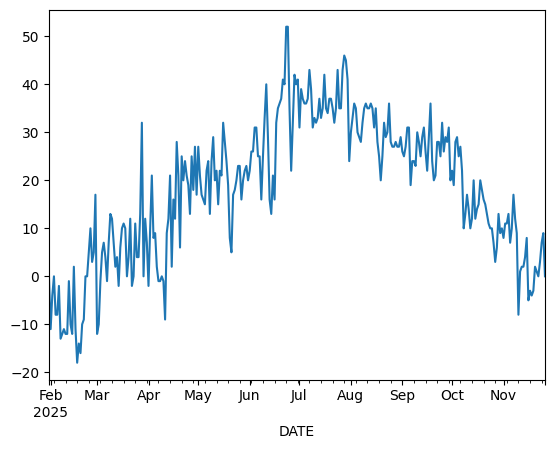

In [403]:
combined["diff"].plot()